In [1]:
#Assignment 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
age=pd.read_csv(r"abalone.csv")

In [4]:
age.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [5]:
age.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
#calculate mean,median and standard deviation of rings

In [8]:
age['Rings'].mean()

9.933684462532918

In [9]:
age['Rings'].median()

9.0

In [10]:
age['Rings'].std()

3.2241690320681284

In [11]:
age['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [12]:
#boxplot

<AxesSubplot:>

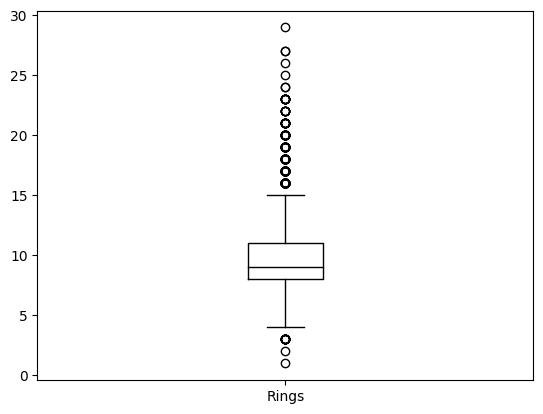

In [13]:
age.boxplot(column=['Rings'], grid=False, color='black')

<AxesSubplot:xlabel='Rings', ylabel='Density'>

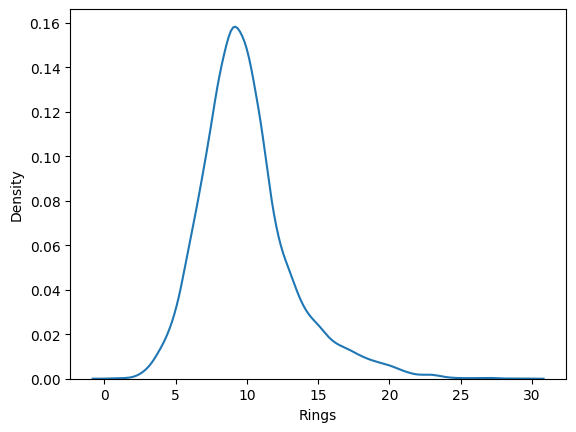

In [14]:
sns.kdeplot(age['Rings'])


array([[<AxesSubplot:title={'center':'Rings'}>]], dtype=object)

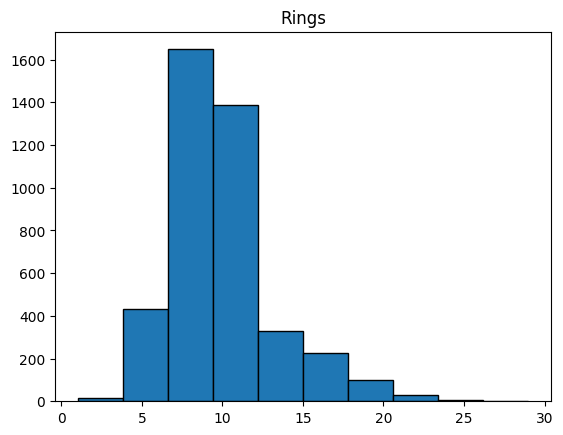

In [15]:
age.hist(column='Rings', grid=False, edgecolor='black')

Text(0, 0.5, 'Diameter')

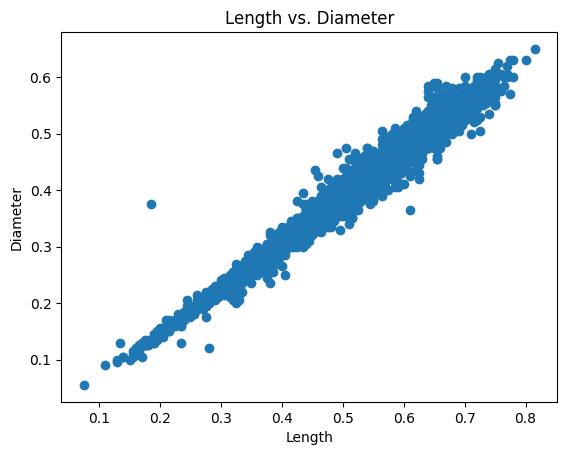

In [16]:
plt.scatter(age.Length, age.Diameter)
plt.title('Length vs. Diameter')
plt.xlabel('Length')
plt.ylabel('Diameter')

In [17]:
age.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [18]:
import statsmodels.api as sm
y=age['Length']
x=age[['Diameter']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Length   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.552e+05
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:05:26   Log-Likelihood:                 10533.
No. Observations:                4177   AIC:                        -2.106e+04
Df Residuals:                    4175   BIC:                        -2.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0369      0.001     29.006      0.0

In [19]:
age.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.07

([<matplotlib.patches.Wedge at 0x1879e63f6d0>,
  ...],
 [Text(1.0999997508552408, 0.0007403501929500061, '0.455'),
  Text(1.099998148549671, 0.0020182138875886693, '0.35'),
  Text(1.0999947218197885, 0.0034076338720816376, '0.53'),
  Text(1.0999886368406886, 0.00499988213501807, '0.44'),
  Text(1.0999822018374175, 0.0062574468361599935, '0.33'),
  Text(1.0999752219489871, 0.007383163161993539, '0.425'),
  Text(1.0999645317313687, 0.008833398722511316, '0.53'),
  Text(1.0999495299440711, 0.010537152168264317, '0.545'),
  Text(1.0999329011259296, 0.01214960989893109, '0.475'),
  Text(1.0999135274756766, 0.013792464464853162, '0.55'),
  Text(1.0998914152590789, 0.015455569849765637, '0.525'),
  Text(1.0998696141765252, 0.016936109682624455, '0.43'),
  Text(1.099845820172513, 0.018416618827903606, '0.49'),
  Text(1.099818009713514, 0.02000863588067266, '0.535'),
  Text(1.0997888894245194, 0.021549911795239712, '0.47'),
  Text(1.0997578220544846, 0.023081005826800054, '0.5'),
  Text(1.09972

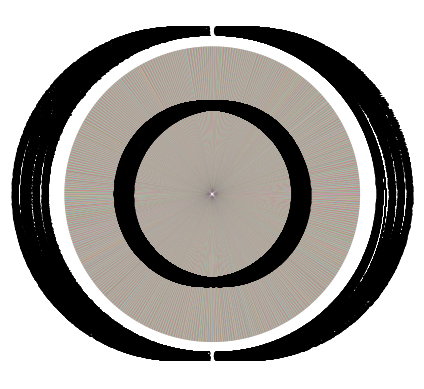

In [20]:
plt.pie(age["Diameter"],labels=age["Length"],autopct="%0.0f%%")

<AxesSubplot:>

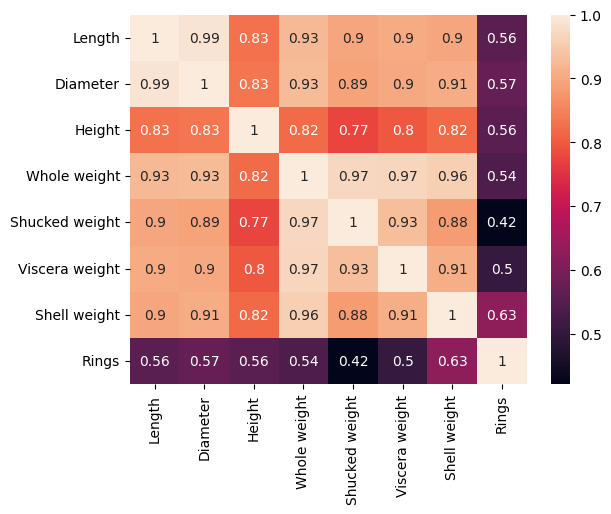

In [21]:
sns.heatmap(age.corr(),annot=True)

In [22]:
age.corr().Length.sort_values()

Rings             0.556720
Height            0.827554
Shell weight      0.897706
Shucked weight    0.897914
Viscera weight    0.903018
Whole weight      0.925261
Diameter          0.986812
Length            1.000000
Name: Length, dtype: float64

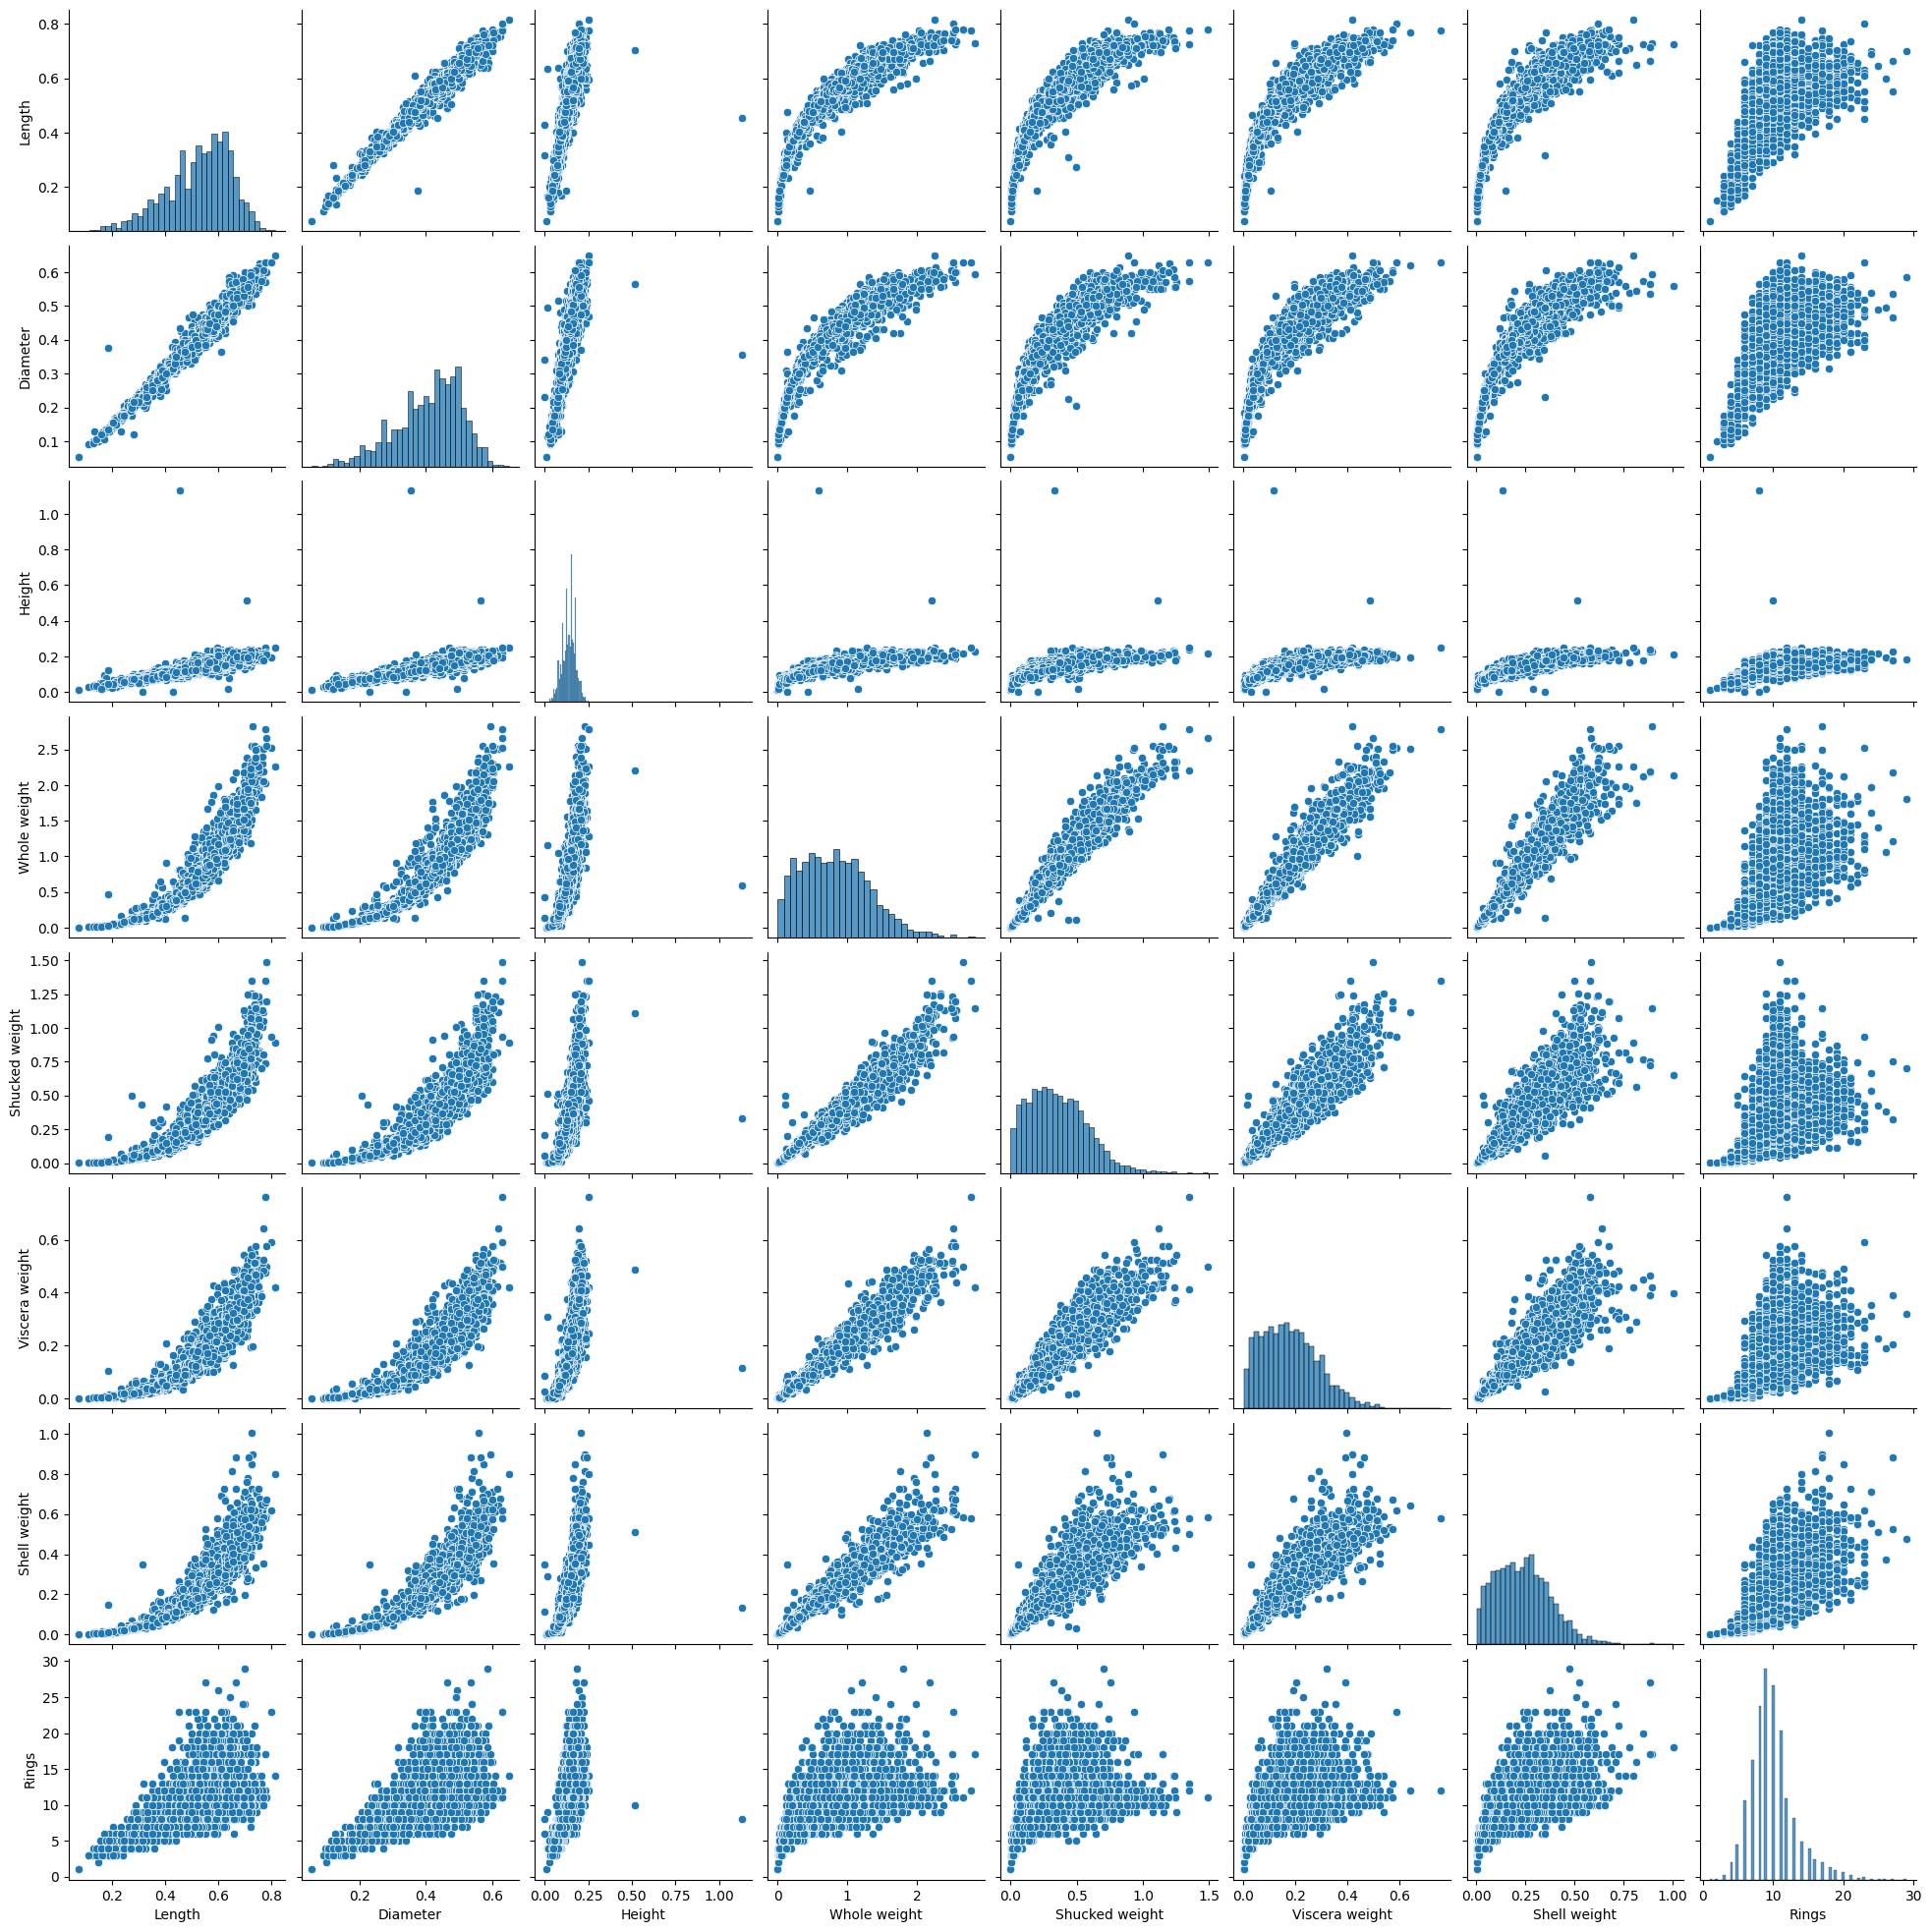

In [23]:
sns.pairplot(age)

<AxesSubplot:>

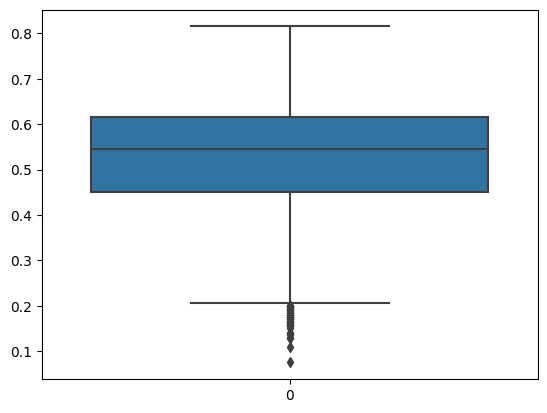

In [24]:
sns.boxplot(age["Length"])

In [25]:
age.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [26]:
df=pd.DataFrame(age)
df.sum()

Sex               MMFMIIFFMFFMMFFMIFMMMIFFFFFMMMMFMFFMFFFMFFIIII...
Length                                                     2188.715
Diameter                                                    1703.72
Height                                                       582.76
Whole weight                                               3461.656
Shucked weight                                             1501.078
Viscera weight                                             754.3395
Shell weight                                               997.5965
Rings                                                         41493
dtype: object

In [27]:
df.sum(1)

0       16.9045
1        8.1485
2       11.3700
3       11.9305
4        8.0540
         ...   
4172    13.9250
4173    13.0450
4174    12.5770
4175    13.4425
4176    17.2255
Length: 4177, dtype: float64

In [28]:
df.mean()

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [29]:
df.std()

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
dtype: float64

In [30]:
df.min()

Sex                    F
Length             0.075
Diameter           0.055
Height               0.0
Whole weight       0.002
Shucked weight     0.001
Viscera weight    0.0005
Shell weight      0.0015
Rings                  1
dtype: object

In [31]:
df.max()

Sex                    M
Length             0.815
Diameter            0.65
Height              1.13
Whole weight      2.8255
Shucked weight     1.488
Viscera weight      0.76
Shell weight       1.005
Rings                 29
dtype: object

In [32]:
df[min]-df[max]

0      -0.1490
1       0.0395
2      -0.2570
3      -0.1510
4       0.0500
         ...  
4172   -0.4370
4173   -0.5260
4174   -0.7010
4175   -0.6095
4176   -1.3935
Length: 4177, dtype: float64

In [33]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [34]:
df.describe(include=['object'])

,Sex
count,4177
unique,3
top,M
freq,1528


In [35]:
df.fillna(value = 100)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [36]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [37]:
df["Length"].mean()

0.5239920995930094

In [38]:
df["Length"].median()

0.545

In [39]:
df["Length"].fillna(df["Length"].mean(),inplace = True)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
df["Diameter"].fillna(df["Diameter"].median(),inplace = True)

In [41]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [42]:
data = {"Name":["rahul","azhar","rachana"],
"Age":[20,21,23],
"Degree":["BE","BE","BCA"],
"Percentage":[60,70,80]}

In [43]:
data = pd.DataFrame(data = data,index = ["row1","row2","row3"])
data

,Name,Age,Degree,Percentage
row1,rahul,20,BE,60
row2,azhar,21,BE,70
row3,rachana,23,BCA,80


In [44]:
data["Degree"] = data["Degree"].fillna(data["Degree"].mode()[0])

In [45]:
data

,Name,Age,Degree,Percentage
row1,rahul,20,BE,60
row2,azhar,21,BE,70
row3,rachana,23,BCA,80


In [46]:
df["Rings"] = np.where(df["Rings"] > 10,11,df["Rings"])


<AxesSubplot:>

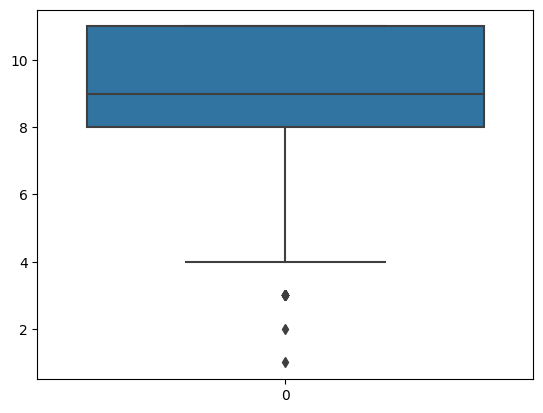

In [47]:
sns.boxplot(df["Rings"])

In [48]:
df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,11
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [49]:
df["Sex"].replace({"F":0, "M":1},inplace = True)
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,11
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,11
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,11
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,11


In [50]:
df["Length"].unique()

array([0.455, 0.35 , 0.53 , 0.44 , 0.33 , 0.425, 0.545, 0.475, 0.55 ,
       0.525, 0.43 , 0.49 , 0.535, 0.47 , 0.5  , 0.355, 0.365, 0.45 ,
       0.38 , 0.565, 0.615, 0.56 , 0.58 , 0.59 , 0.605, 0.575, 0.68 ,
       0.665, 0.705, 0.465, 0.54 , 0.24 , 0.205, 0.21 , 0.39 , 0.46 ,
       0.325, 0.52 , 0.4  , 0.485, 0.405, 0.445, 0.245, 0.505, 0.595,
       0.31 , 0.555, 0.57 , 0.6  , 0.62 , 0.625, 0.695, 0.36 , 0.51 ,
       0.435, 0.495, 0.385, 0.515, 0.37 , 0.27 , 0.375, 0.7  , 0.71 ,
       0.265, 0.305, 0.345, 0.65 , 0.28 , 0.175, 0.17 , 0.635, 0.645,
       0.61 , 0.725, 0.235, 0.315, 0.225, 0.64 , 0.63 , 0.585, 0.42 ,
       0.335, 0.415, 0.275, 0.295, 0.075, 0.13 , 0.11 , 0.16 , 0.23 ,
       0.3  , 0.32 , 0.655, 0.66 , 0.2  , 0.165, 0.19 , 0.74 , 0.34 ,
       0.675, 0.745, 0.685, 0.69 , 0.67 , 0.29 , 0.26 , 0.395, 0.41 ,
       0.22 , 0.255, 0.735, 0.155, 0.48 , 0.195, 0.25 , 0.18 , 0.15 ,
       0.215, 0.73 , 0.715, 0.765, 0.185, 0.285, 0.72 , 0.75 , 0.755,
       0.78 , 0.815,

In [51]:
data_main = pd.get_dummies(df,columns=["Length"])

In [52]:
data_main.head(10)

,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Length_0.075,Length_0.11,...,Length_0.745,Length_0.75,Length_0.755,Length_0.76,Length_0.765,Length_0.77,Length_0.775,Length_0.78,Length_0.8,Length_0.815
0,1,0.365,0.095,0.5140,0.2245,0.1010,0.150,11,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,...,0,0,0,0,0,0,0,0,0,0
5,I,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0.415,0.150,0.7775,0.2370,0.1415,0.330,11,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0.425,0.125,0.7680,0.2940,0.1495,0.260,11,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0.440,0.150,0.8945,0.3145,0.1510,0.320,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.head(0)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [54]:
x = df.iloc[:,1:2]
x

,Length
0,0.455
1,0.350
2,0.530
3,0.440
4,0.330
...,...
4172,0.565
4173,0.590
4174,0.600
4175,0.625


In [55]:
y = df.iloc[:,1:]
y

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,11
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [56]:
from sklearn.model_selection import train_test_split
df = df.rename(columns = {'fit': 'fit_feature'})

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
((3341, 1), (836, 1), (3341, 8), (836, 8))
x_test

,Length
668,0.550
1580,0.500
3784,0.620
463,0.220
2615,0.645
...,...
575,0.610
3231,0.410
1084,0.445
290,0.540


<AxesSubplot:xlabel='Length', ylabel='Diameter'>

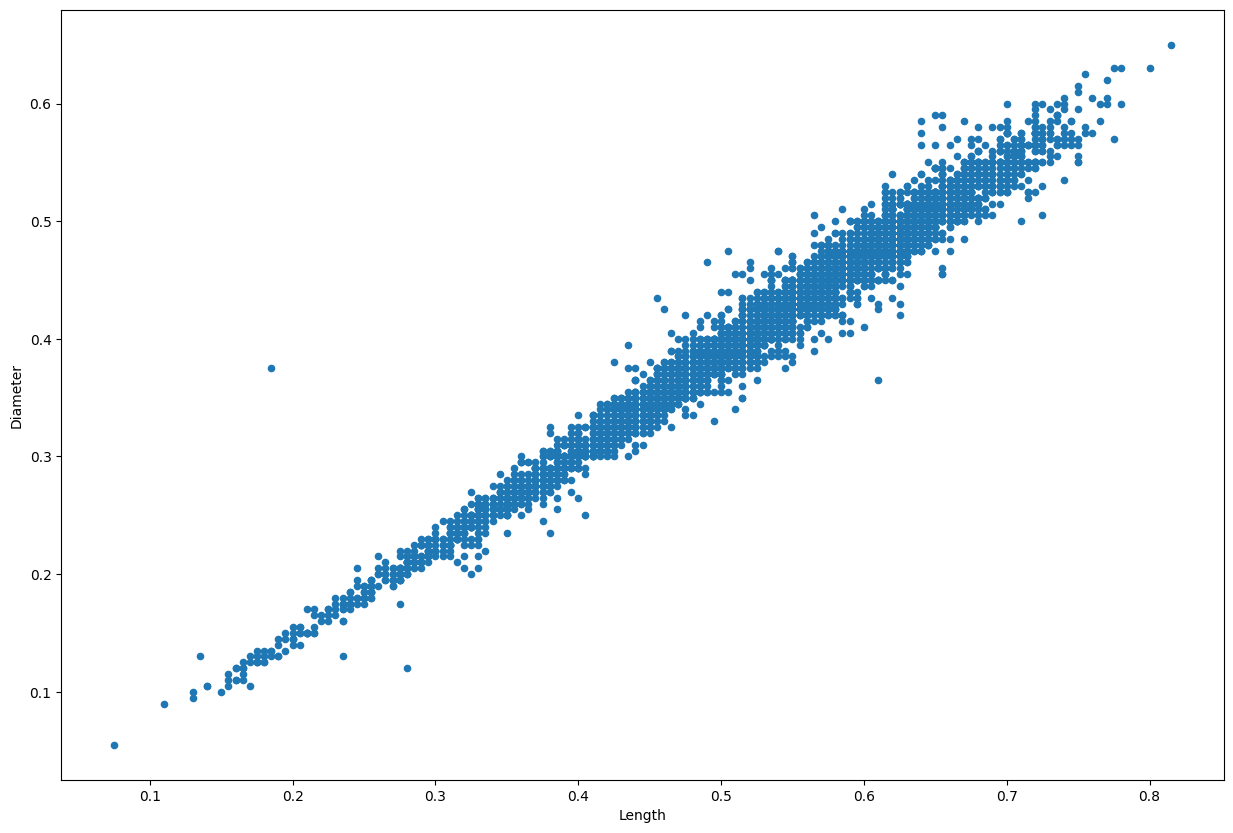

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.plot.scatter("Length","Diameter", figsize=(15,10))

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
LinearRegression()
predict = model.predict(x)
predict


array([[ 0.455     ,  0.35162091,  0.11963095, ...,  0.12372858,
         0.16704094,  8.36010434],
       [ 0.35      ,  0.26599754,  0.08936702, ...,  0.03718493,
         0.0577829 ,  7.18547862],
       [ 0.53      ,  0.41278046,  0.14124804, ...,  0.18554547,
         0.2450824 ,  9.19912271],
       ...,
       [ 0.6       ,  0.46986271,  0.161424  , ...,  0.24324124,
         0.31792109,  9.98220652],
       [ 0.625     ,  0.49024923,  0.1686297 , ...,  0.26384687,
         0.34393491, 10.26187931],
       [ 0.71      ,  0.55956339,  0.19312907, ...,  0.33390601,
         0.43238189, 11.21276679]])

In [60]:
train=df.sample(frac=0.8,random_state=200)

In [61]:
train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3384,0,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.0450,7
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
2639,I,0.460,0.370,0.120,0.5335,0.2645,0.1080,0.1345,6
2589,1,0.575,0.450,0.155,0.9480,0.4290,0.2060,0.2590,7
1270,I,0.470,0.355,0.180,0.4800,0.2055,0.1050,0.1505,8
...,...,...,...,...,...,...,...,...,...
2288,I,0.330,0.265,0.090,0.1800,0.0680,0.0360,0.0600,6
1236,I,0.375,0.275,0.090,0.2180,0.0930,0.0405,0.0755,6
3753,I,0.475,0.360,0.110,0.4520,0.1910,0.0990,0.1300,8
3461,0,0.625,0.495,0.160,1.1115,0.4495,0.2825,0.3450,11


In [62]:
np.random.seed(2)
from sklearn.metrics import r2_score
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x
train_x = x[:80]
train_y = y[:80]
test_x = x[80:]
test_y = y[80:]
mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))
r2 = r2_score(test_y, mymodel(test_x))
print(r2)

0.8086921460343581


In [66]:
import tracemalloc
import pandas as pd
import dask.dataframe as dd
import time
def tracing_start():
    tracemalloc.stop()
    print("nTracing Status : ", tracemalloc.is_tracing())
    tracemalloc.start()
    print("Tracing Status : ", tracemalloc.is_tracing())
def tracing_mem():
    first_size, first_peak = tracemalloc.get_traced_memory()
    peak = first_peak/(1024*1024)
    print("Peak Size in MB - ", peak)
tracing_start()
start = time.time()
sq_list1 = [elem + elem**2 for elem in range(1,1000)]
#print(sq_list1)
end = time.time()
print("time elapsed {} milli seconds".format((end-start)*1000))
tracing_mem()

nTracing Status :  False
Tracing Status :  True
time elapsed 15.661239624023438 milli seconds
Peak Size in MB -  0.05539703369140625
